My Capstone Project - Assignement 9: Laptop Price Prediction


In [1]:
%cd /content/drive/MyDrive/CapstoneProject

/content/drive/MyDrive/CapstoneProject


This project is based on the kaggle dataset laptop prices: available at (https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction/data)

The goal of this assignment is to create a machine learning model that can predict laptop prices based on its characteristics.

Whilst approaching this task I will split it up into separate steps to create a data analysis and prediction model.


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
LaptopData = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Laptop_price.csv', encoding = 'latin')
print('Before deleting duplicate values: ', LaptopData.shape)

LaptopData = LaptopData.drop_duplicates()
print('Shape after removing duplicate values: ', LaptopData.shape)

LaptopData.head(10)

Before deleting duplicate values:  (1000, 7)
Shape after removing duplicate values:  (1000, 7)


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


Key details from this:
* This file contains 1000 details about laptops
*There are 7 attributes outlined below:
* Brand
* Processor Speed
* RAM Size
* Storage Capacity
* Screen Size
* Weight
* Price

## Problem statement definition
* Creating a prediction model to predict the price of a laptop
* Target variable : Price predictors/features: Brand, Processor Speed, Ram Size, etc.

* Based on the problem statement we need to create a ML regression model due to the target variable being continuous

<Axes: >

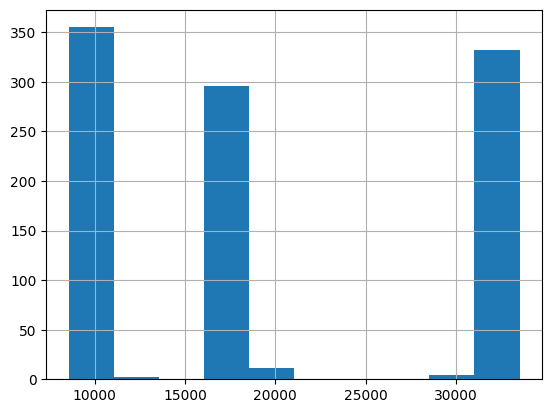

In [4]:
%matplotlib inline
#Creating a histogram for price to understand the distribution of values
LaptopData['Price'].hist()

Next we will have a basic exploratory data analysis. This is so we can gauge the overall data.
* The volume of data
* Identify which columns are Quantitative, Categorical or Qualitative
* This will help start the column/data rejection process.
* If one of the columns doesn't affect laptop price it will be removed.

In [5]:
LaptopData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [6]:
LaptopData.describe(include='all')

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN
freq,210,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,NaN,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,NaN,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,NaN,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,NaN,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,NaN,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754


In [7]:
LaptopData.nunique()

Brand                  5
Processor_Speed     1000
RAM_Size               4
Storage_Capacity       3
Screen_Size         1000
Weight              1000
Price               1000
dtype: int64

As the number of unique entries for:
* Brand
* RAM size
* Storage Capacity
Are under 20, we can rule them as categorical and *not* continuous. However, as Brand is an object and not an integer/float, we can guess that it is a qualitative form of data. Therefore the following attributes will be selected:
* Brand - Categorical / Qualitative
* Processor Speed - Continuous
* RAM Size - Categorical
* Storage Capacity - Categorical
* Screen Size - Continuous
* Weight - Continuous
* Price - Target/Class variable

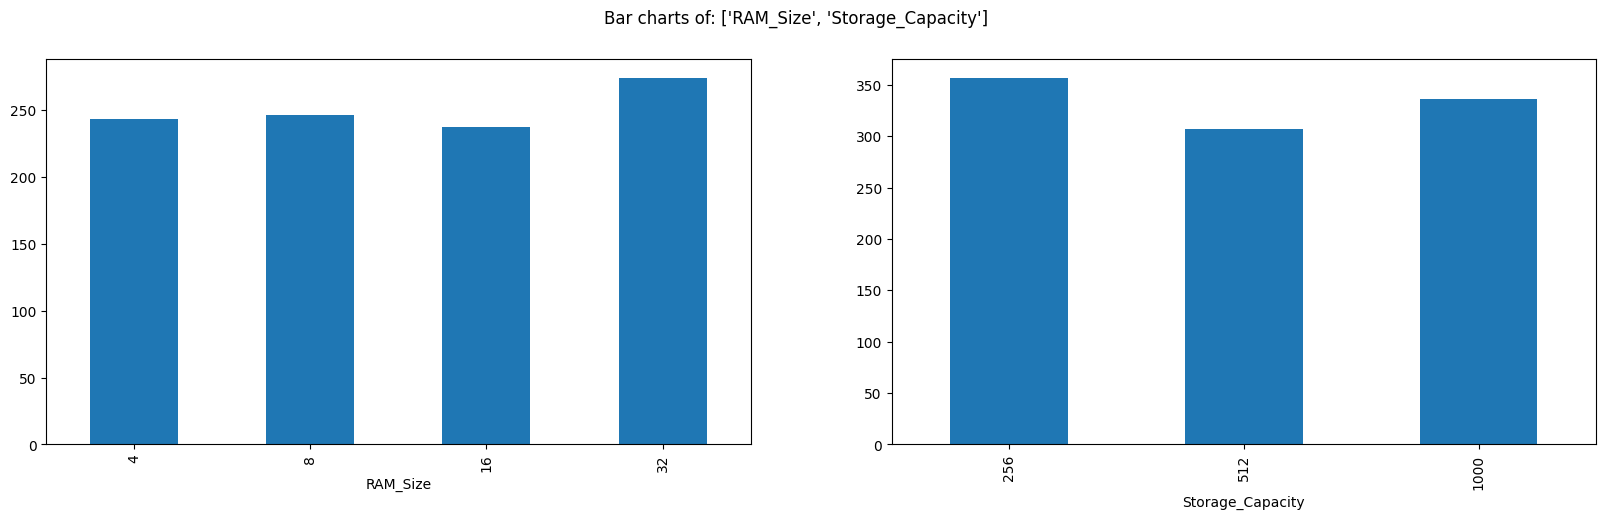

In [12]:
# We will now perform a visual exploratory data analysis
# We will do this by making bar plots of our categorical attributes

def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline
  import matplotlib.pyplot as plt
  # Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))
  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


PlotBarCharts(inpData=LaptopData, colsToPlot = ['RAM_Size','Storage_Capacity'])


Both of these attributes have good comparable frequency, meaning that there are enough rows for each category in the data for the ML regression algorithm to learn.

array([[<Axes: title={'center': 'Processor_Speed'}>,
        <Axes: title={'center': 'Screen_Size'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

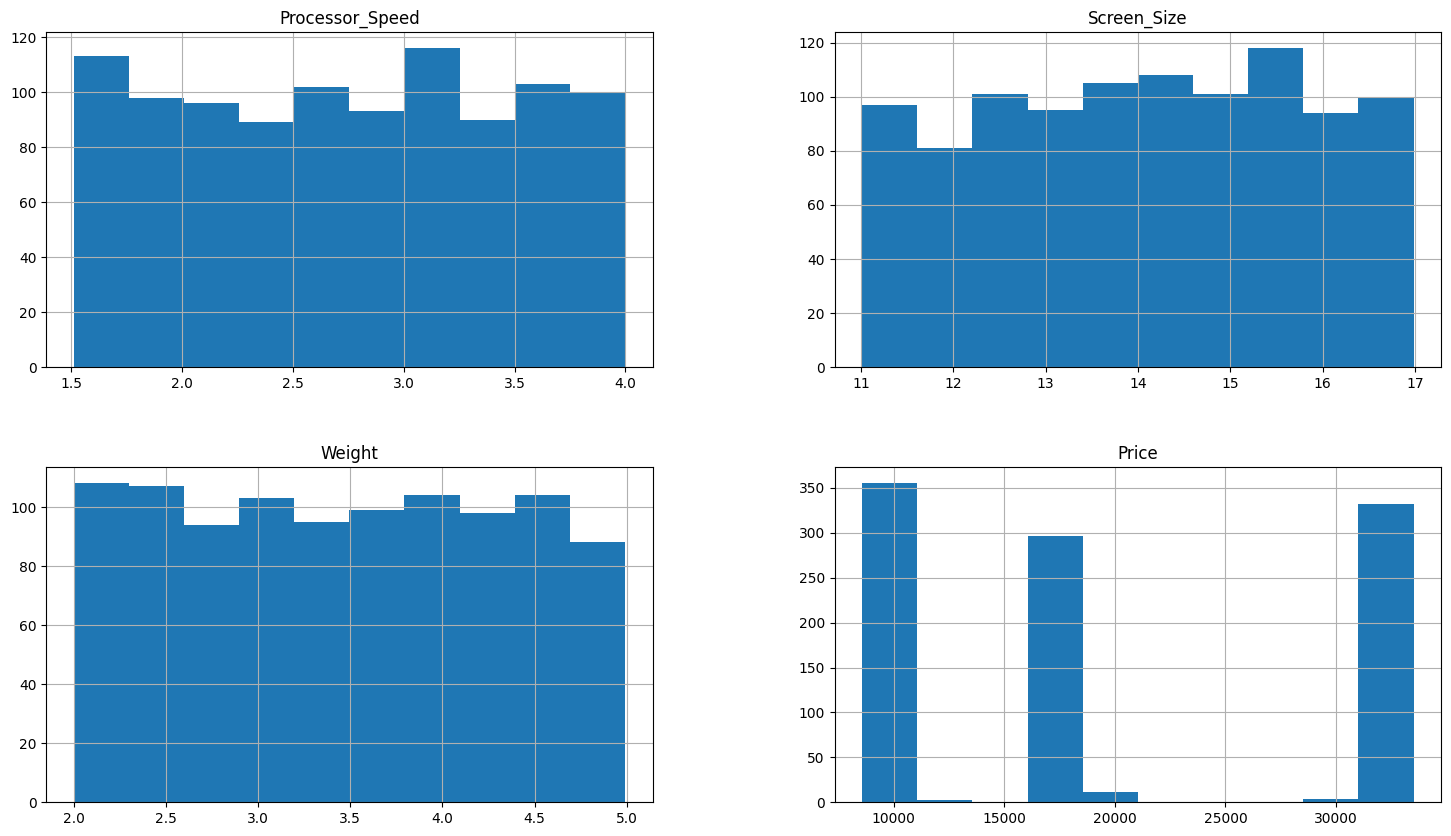

In [14]:
## We will now plot histograms of the continious predictor variables

LaptopData.hist(['Processor_Speed', 'Screen_Size','Weight','Price'], figsize=(18,10))

The Distribution for all of these sets of data is good, therefore no outliers need to be treated.

In [15]:
## We will now check for any missing values for each column

LaptopData.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

There are no missing values, so now we will begin relationship exploration. As our target variable is continious, we will use scatter charts to check the relationship between price and the other continious attribtutes.

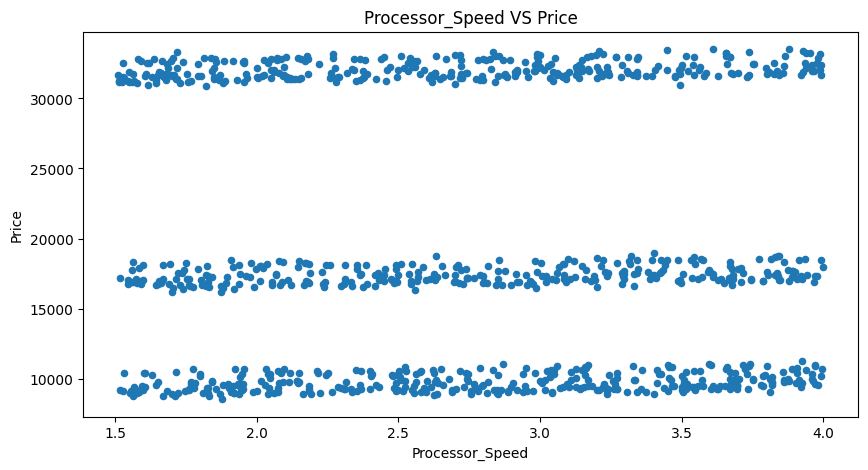

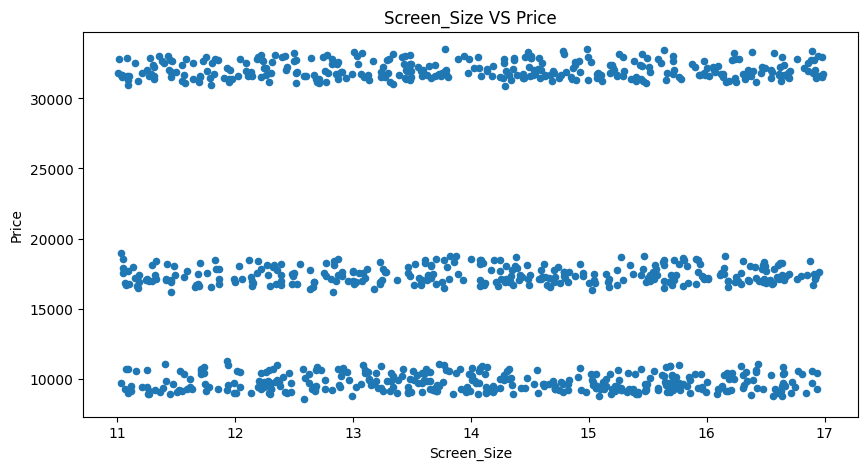

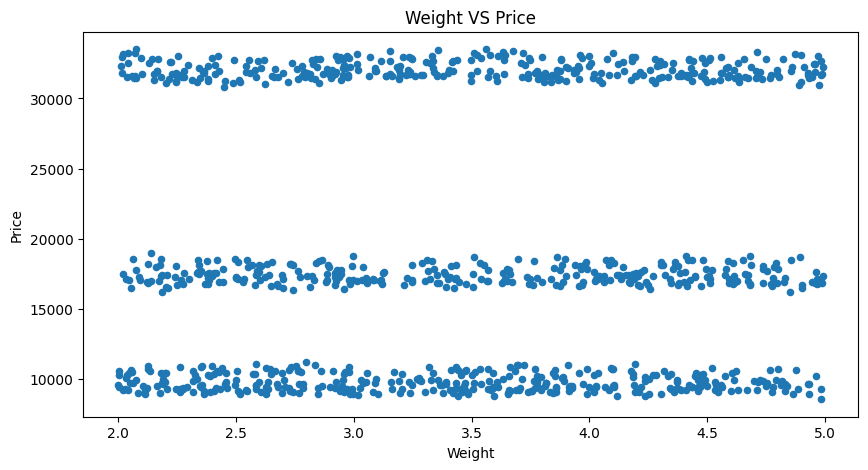

In [16]:
ContinuousCols = ['Processor_Speed','Screen_Size','Weight']

for predictor in ContinuousCols:
  LaptopData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title = predictor+' VS '+ 'Price' )


As these scatter graphs are inconclusive, we will be using a correlation matrix to identify the relationship between the target variable and the predictors.

In [17]:
ContinuousCols = ['Price','Weight','Screen_Size','Processor_Speed']

CorrelationData = LaptopData[ContinuousCols].corr()
CorrelationData

,Price,Weight,Screen_Size,Processor_Speed
Price,1.000000,0.038417,-0.026740,-0.050737
Weight,0.038417,1.000000,0.021995,-0.054603
Screen_Size,-0.026740,0.021995,1.000000,-0.013425
Processor_Speed,-0.050737,-0.054603,-0.013425,1.000000


In [22]:
#Now we filter for only columns where abs correlation >0.5 with target variable

CorrelationData['Price'][abs(CorrelationData['Price'])> 0.1]

Price    1.0
Name: Price, dtype: float64

As seen, even dropping the abs correlation to .1, there are no correlated attributes to price within the continuous data, so now we will move onto categorical.

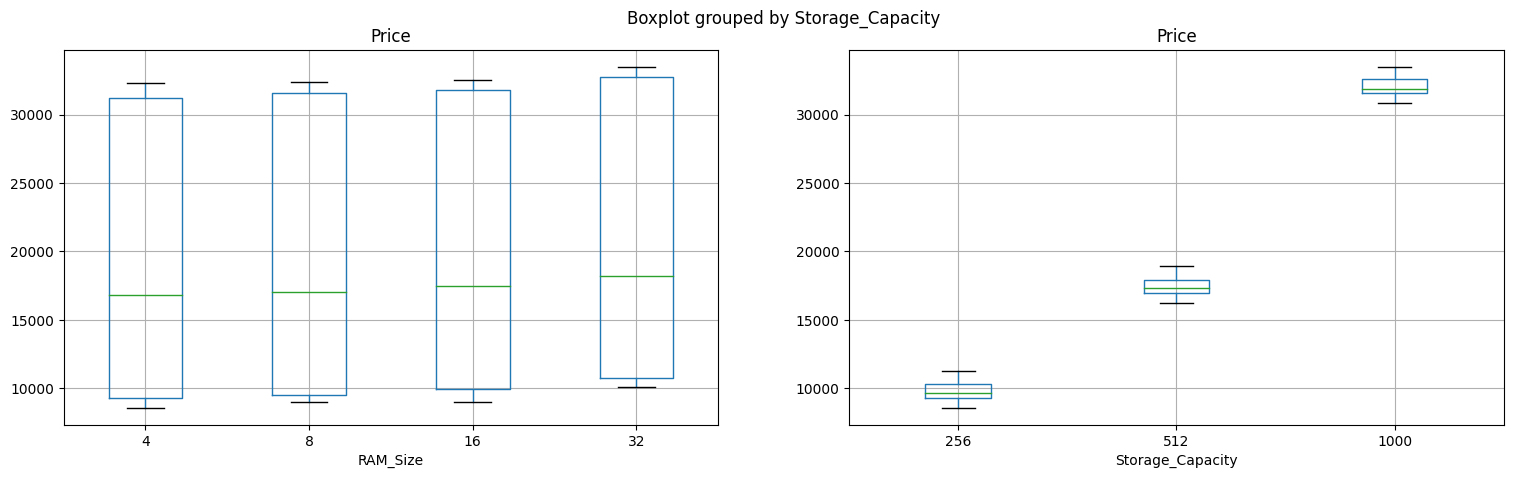

In [24]:
# We will create box plots for target variable price and categorical predictors

CategColsList = ['RAM_Size','Storage_Capacity']

import matplotlib.pyplot as plt
fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(CategColsList), figsize=(18,5))

for PredictCol, i in zip(CategColsList, range(len(CategColsList))):
  LaptopData.boxplot(column='Price', by =PredictCol, figsize=(5,5), vert= True, ax=PlotCanvas[i])



As we can see the boxes for RAM Size haven't been affected much, where as storage capacity is not in line with eachother. We will perform an ANOVA test now for better results

In [25]:
def FunctionAnova(inpData, TargetVariable, CategPredictorList):
  from scipy.stats import f_oneway

  SelectedPredictors =[]

  print('-----ANOVA Results----- \n')

  for predictor in CategPredictorList:
    CategGroupLists = inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategGroupLists)

    if (AnovaResults[1] < 0.05):
      print(predictor, ' is correlated with ', TargetVariable, '| P-Value: ',AnovaResults[1])
      SelectedPredictors.append(predictor)

    else:
      print(predictor, 'is not correlated with ', TargetVariable, ' P-Value = ',AnovaResults)

  return(SelectedPredictors)

CategPredictorList = ['RAM_Size','Storage_Capacity']

FunctionAnova(inpData=LaptopData, TargetVariable='Price',CategPredictorList=CategPredictorList)


-----ANOVA Results----- 

RAM_Size is not correlated with  Price  P-Value =  F_onewayResult(statistic=2.1261838981544265, pvalue=0.09529165426315755)
Storage_Capacity  is correlated with  Price | P-Value:  0.0


['Storage_Capacity']

From this we've learnt that Storage Capacity is the only attribute correlated with price. Therefore, we must select that as our final predictor for building a ML/AI model.

In [39]:
SelectedColumns = ['Storage_Capacity','Price']

DataForML = LaptopData[SelectedColumns]
DataForML.head()

,Storage_Capacity,Price
0,512,17395.093065
1,1000,31607.605919
2,256,9291.023542
3,512,17436.728334
4,1000,32917.990718


In [40]:
#Now we save this data for reference throughout deployment

DataForML.to_pickle('DataForML.pk1')


Now we must convert our nominal variables into numeric. We can do this by using get_dummies()

In [41]:
DataForML_Num = pd.get_dummies(DataForML)

DataForML_Num['Price']=LaptopData['Price']

DataForML_Num.head()

,Storage_Capacity,Price
0,512,17395.093065
1,1000,31607.605919
2,256,9291.023542
3,512,17436.728334
4,1000,32917.990718


Now we must split the data into a training and testing sample.

In [42]:
DataForML_Num.columns

Index(['Storage_Capacity', 'Price'], dtype='object')

In [43]:
TargetVariable = 'Price'
Predictors = 'Storage_Capacity'

x = DataForML_Num[Predictors].values
y = DataForML_Num[TargetVariable].values

#Now we make the training and testing data sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 428)


In [44]:
#Now we begin multiple linear regression algorith for our ML/AI model building

from sklearn.linear_model import LinearRegression
RegressionModel = LinearRegression()

print(RegressionModel)

LReg = RegressionModel.fit(X_train,y_train)
prediction = LReg.predict(X_test)

from sklearn import metrics

print('R2 Value: ',metrics.r2_score(y_train, LReg.predict(X_train)))

print('\n Model Validation/Accuracy Calculations')

TestDataResults = pd.DataFrame(data=X_test, columns = Predictors)
TestDataResults[TargetVariable]=y_test
TestDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestDataResults.head())

TestDataResults['APE']=100*((abs(TestDataResults['Price']-TestDataResults['PredictedPrice']))/TestDataResults['Price'])

MAPE = np.mean(TestDataResults['APE'])
MedianMAPE=np.median(TestDataResults['APE'])

Accuracy = 100 - MAPE
Median_Accuracy = 100 - MedianMAPE

print('Mean Accuracy: ',Accuracy)
print('Median Accuracy: ',Median_Accuracy)

def AccuracyScore(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
customScoring = make_scorer(AccuracyScore, greater_is_better = True)

from sklearn.model_selection import cross_val_score

AccuracyValue = cross_val_score(RegressionModel, x, y, cv=10, scoring = customScoring)

print('\n Accuracy value for 10-fold Cross validation: \n', AccuracyValue)
print('\n Final Average accuracy of model: ', round(AccuracyValue.mean(),2))



LinearRegression()


ValueError: Expected 2D array, got 1D array instead:
array=[1000 1000 1000  256 1000 1000 1000  512  256 1000  512 1000  256  256
  256 1000  512 1000  256  512 1000  256 1000  512 1000 1000  256  256
  256  256 1000 1000 1000 1000 1000  256  256 1000  512  512  512 1000
  512 1000  256  512  512  512  512  512 1000 1000  512  512 1000  512
  512 1000  512  256 1000 1000  256  512  512  512  256  256 1000 1000
  256  256  512  512 1000  256  256  512  512  512  256  512  512  512
 1000  512  256  256  512  512  256  512  256 1000 1000 1000  256 1000
 1000 1000  256 1000  512  256  256  512  512  256  256  256 1000 1000
  256  512 1000 1000  256 1000 1000  512 1000  256  256  256  512  256
 1000  256 1000  256  256  512  256  256 1000  256 1000  512  512  512
  256 1000  512 1000  256  256 1000 1000 1000  512 1000 1000 1000 1000
 1000  256  256  512  512  256  256 1000 1000  512  512 1000  512  256
 1000  512  512  512  512  512  512  256 1000  512  256  512  256  256
  256 1000  256 1000  256  256 1000  256  256  256 1000 1000  512 1000
  256  256 1000 1000  512  256 1000 1000  256 1000  256  256  256 1000
  256  512  512  256  512 1000  256  256 1000  512 1000 1000  512 1000
  512 1000  512  256  256  512  256  256  512 1000  256  512  512  512
  512  512  512  256  256  512 1000  256 1000  512  512  256 1000  256
  256 1000 1000  256 1000 1000  256  512  512  256  256 1000  256  256
 1000 1000  512  512 1000  256  512  256  256  256 1000 1000  256 1000
  256  512 1000  512 1000  512 1000  256  512  256 1000  512 1000 1000
  512  256  256  256  512 1000  256  256  256  512  256 1000 1000  512
  256  512  256 1000  512 1000 1000 1000  512  512  256  256 1000  512
  256  256 1000 1000  256  256 1000  512  256  512  512  256  256  512
  512 1000  512  256 1000 1000  256  256  256  512  256  256  512  512
  512 1000  512  256  512 1000  512  256  512  512  512  512  256  512
 1000 1000  256  256  512  256  256  512  512  256  512  512 1000  512
 1000 1000  512  256 1000  512 1000  512  256 1000 1000  256  256 1000
  256  512 1000  512 1000  256 1000  512  256  512  256 1000  512 1000
  256  512  512 1000  256  256  512 1000 1000 1000  256 1000  512 1000
 1000  256  256 1000 1000  256 1000  512 1000 1000  512  256  512 1000
  256 1000 1000 1000 1000 1000  256 1000  256 1000 1000  512 1000  512
  256 1000  256  512  256  256  512 1000 1000  256 1000 1000  256 1000
  512  512  256  512  512  256  256 1000  256  512 1000  256  512 1000
 1000 1000 1000  512  256 1000  512 1000  256  512 1000 1000  512  512
  512  256  256  512  256  256 1000 1000  256  512  512  512 1000 1000
 1000 1000  256  512  256  512  256  256  256  512 1000  512  256 1000
  256  256  512  256 1000 1000 1000  512  512  512  512  512  256 1000
  512  512  256 1000  256  256  512 1000 1000  256  256 1000  256  256
  512  256 1000  512  256  512 1000  256  256 1000  256 1000  512  256
 1000 1000  512  512 1000 1000  256 1000 1000  256 1000  256  256 1000
 1000  256 1000  256 1000 1000  512  256  256 1000 1000 1000  256  256
  512  512  256  512  512  512 1000  256  512 1000  256 1000  256 1000
 1000  512 1000  256  256  512 1000  512 1000  256  256 1000 1000  256
  256 1000 1000 1000 1000  512 1000  256  256 1000  512  256  256  512
  256  256 1000  256  256 1000  256 1000  256  256  512  512  256 1000
  256  512 1000 1000  512  256  256  256  256 1000 1000 1000 1000  256
  512 1000  256 1000 1000  512  512  256  256  512  256 1000  256  512
  256  512 1000  512 1000  256  256  512  256 1000  512  512  256 1000
  512 1000 1000 1000 1000 1000  512  512  512 1000 1000  512  256  256].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Now we begin multiple linear regression algorith for our ML/AI model building

from sklearn.linear_model import LinearRegression
RegressionModel = LinearRegression()

print(RegressionModel)

LReg = RegressionModel.fit(X_train,y_train)
prediction = LReg.predict(X_test)

from sklearn import metrics

print('R2 Value: ',metrics.r2_score(y_train, LReg.predict(X_train)))

print('\n Model Validation/Accuracy Calculations')

TestDataResults = pd.DataFrame(data=X_test, columns = Predictors)
TestDataResults[TargetVariable]=y_test
TestDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestDataResults.head())

TestDataResults['APE']=100*((abs(TestDataResults['Price']-TestDataResults['PredictedPrice']))/TestDataResults['Price'])

MAPE = np.mean(TestDataResults['APE'])
MedianMAPE=np.median(TestDataResults['APE'])

Accuracy = 100 - MAPE
Median_Accuracy = 100 - MedianMAPE

print('Mean Accuracy: ',Accuracy)
print('Median Accuracy: ',Median_Accuracy)

def AccuracyScore(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
customScoring = make_scorer(AccuracyScore, greater_is_better = True)

from sklearn.model_selection import cross_val_score

AccuracyValue = cross_val_score(RegressionModel, x, y, cv=10, scoring = customScoring)

print('\n Accuracy value for 10-fold Cross validation: \n', AccuracyValue)
print('\n Final Average accuracy of model: ', round(AccuracyValue.mean(),2))



LinearRegression()


ValueError: Expected 2D array, got 1D array instead:
array=[1000 1000 1000  256 1000 1000 1000  512  256 1000  512 1000  256  256
  256 1000  512 1000  256  512 1000  256 1000  512 1000 1000  256  256
  256  256 1000 1000 1000 1000 1000  256  256 1000  512  512  512 1000
  512 1000  256  512  512  512  512  512 1000 1000  512  512 1000  512
  512 1000  512  256 1000 1000  256  512  512  512  256  256 1000 1000
  256  256  512  512 1000  256  256  512  512  512  256  512  512  512
 1000  512  256  256  512  512  256  512  256 1000 1000 1000  256 1000
 1000 1000  256 1000  512  256  256  512  512  256  256  256 1000 1000
  256  512 1000 1000  256 1000 1000  512 1000  256  256  256  512  256
 1000  256 1000  256  256  512  256  256 1000  256 1000  512  512  512
  256 1000  512 1000  256  256 1000 1000 1000  512 1000 1000 1000 1000
 1000  256  256  512  512  256  256 1000 1000  512  512 1000  512  256
 1000  512  512  512  512  512  512  256 1000  512  256  512  256  256
  256 1000  256 1000  256  256 1000  256  256  256 1000 1000  512 1000
  256  256 1000 1000  512  256 1000 1000  256 1000  256  256  256 1000
  256  512  512  256  512 1000  256  256 1000  512 1000 1000  512 1000
  512 1000  512  256  256  512  256  256  512 1000  256  512  512  512
  512  512  512  256  256  512 1000  256 1000  512  512  256 1000  256
  256 1000 1000  256 1000 1000  256  512  512  256  256 1000  256  256
 1000 1000  512  512 1000  256  512  256  256  256 1000 1000  256 1000
  256  512 1000  512 1000  512 1000  256  512  256 1000  512 1000 1000
  512  256  256  256  512 1000  256  256  256  512  256 1000 1000  512
  256  512  256 1000  512 1000 1000 1000  512  512  256  256 1000  512
  256  256 1000 1000  256  256 1000  512  256  512  512  256  256  512
  512 1000  512  256 1000 1000  256  256  256  512  256  256  512  512
  512 1000  512  256  512 1000  512  256  512  512  512  512  256  512
 1000 1000  256  256  512  256  256  512  512  256  512  512 1000  512
 1000 1000  512  256 1000  512 1000  512  256 1000 1000  256  256 1000
  256  512 1000  512 1000  256 1000  512  256  512  256 1000  512 1000
  256  512  512 1000  256  256  512 1000 1000 1000  256 1000  512 1000
 1000  256  256 1000 1000  256 1000  512 1000 1000  512  256  512 1000
  256 1000 1000 1000 1000 1000  256 1000  256 1000 1000  512 1000  512
  256 1000  256  512  256  256  512 1000 1000  256 1000 1000  256 1000
  512  512  256  512  512  256  256 1000  256  512 1000  256  512 1000
 1000 1000 1000  512  256 1000  512 1000  256  512 1000 1000  512  512
  512  256  256  512  256  256 1000 1000  256  512  512  512 1000 1000
 1000 1000  256  512  256  512  256  256  256  512 1000  512  256 1000
  256  256  512  256 1000 1000 1000  512  512  512  512  512  256 1000
  512  512  256 1000  256  256  512 1000 1000  256  256 1000  256  256
  512  256 1000  512  256  512 1000  256  256 1000  256 1000  512  256
 1000 1000  512  512 1000 1000  256 1000 1000  256 1000  256  256 1000
 1000  256 1000  256 1000 1000  512  256  256 1000 1000 1000  256  256
  512  512  256  512  512  512 1000  256  512 1000  256 1000  256 1000
 1000  512 1000  256  256  512 1000  512 1000  256  256 1000 1000  256
  256 1000 1000 1000 1000  512 1000  256  256 1000  512  256  256  512
  256  256 1000  256  256 1000  256 1000  256  256  512  512  256 1000
  256  512 1000 1000  512  256  256  256  256 1000 1000 1000 1000  256
  512 1000  256 1000 1000  512  512  256  256  512  256 1000  256  512
  256  512 1000  512 1000  256  256  512  256 1000  512  512  256 1000
  512 1000 1000 1000 1000 1000  512  512  512 1000 1000  512  256  256].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Now we begin multiple linear regression algorith for our ML/AI model building

from sklearn.linear_model import LinearRegression
RegressionModel = LinearRegression()

print(RegressionModel)

LReg = RegressionModel.fit(X_train,y_train)
prediction = LReg.predict(X_test)

from sklearn import metrics

print('R2 Value: ',metrics.r2_score(y_train, LReg.predict(X_train)))

print('\n Model Validation/Accuracy Calculations')

TestDataResults = pd.DataFrame(data=X_test, columns = Predictors)
TestDataResults[TargetVariable]=y_test
TestDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestDataResults.head())

TestDataResults['APE']=100*((abs(TestDataResults['Price']-TestDataResults['PredictedPrice']))/TestDataResults['Price'])

MAPE = np.mean(TestDataResults['APE'])
MedianMAPE=np.median(TestDataResults['APE'])

Accuracy = 100 - MAPE
Median_Accuracy = 100 - MedianMAPE

print('Mean Accuracy: ',Accuracy)
print('Median Accuracy: ',Median_Accuracy)

def AccuracyScore(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
customScoring = make_scorer(AccuracyScore, greater_is_better = True)

from sklearn.model_selection import cross_val_score

AccuracyValue = cross_val_score(RegressionModel, x, y, cv=10, scoring = customScoring)

print('\n Accuracy value for 10-fold Cross validation: \n', AccuracyValue)
print('\n Final Average accuracy of model: ', round(AccuracyValue.mean(),2))



LinearRegression()


ValueError: Expected 2D array, got 1D array instead:
array=[1000 1000 1000  256 1000 1000 1000  512  256 1000  512 1000  256  256
  256 1000  512 1000  256  512 1000  256 1000  512 1000 1000  256  256
  256  256 1000 1000 1000 1000 1000  256  256 1000  512  512  512 1000
  512 1000  256  512  512  512  512  512 1000 1000  512  512 1000  512
  512 1000  512  256 1000 1000  256  512  512  512  256  256 1000 1000
  256  256  512  512 1000  256  256  512  512  512  256  512  512  512
 1000  512  256  256  512  512  256  512  256 1000 1000 1000  256 1000
 1000 1000  256 1000  512  256  256  512  512  256  256  256 1000 1000
  256  512 1000 1000  256 1000 1000  512 1000  256  256  256  512  256
 1000  256 1000  256  256  512  256  256 1000  256 1000  512  512  512
  256 1000  512 1000  256  256 1000 1000 1000  512 1000 1000 1000 1000
 1000  256  256  512  512  256  256 1000 1000  512  512 1000  512  256
 1000  512  512  512  512  512  512  256 1000  512  256  512  256  256
  256 1000  256 1000  256  256 1000  256  256  256 1000 1000  512 1000
  256  256 1000 1000  512  256 1000 1000  256 1000  256  256  256 1000
  256  512  512  256  512 1000  256  256 1000  512 1000 1000  512 1000
  512 1000  512  256  256  512  256  256  512 1000  256  512  512  512
  512  512  512  256  256  512 1000  256 1000  512  512  256 1000  256
  256 1000 1000  256 1000 1000  256  512  512  256  256 1000  256  256
 1000 1000  512  512 1000  256  512  256  256  256 1000 1000  256 1000
  256  512 1000  512 1000  512 1000  256  512  256 1000  512 1000 1000
  512  256  256  256  512 1000  256  256  256  512  256 1000 1000  512
  256  512  256 1000  512 1000 1000 1000  512  512  256  256 1000  512
  256  256 1000 1000  256  256 1000  512  256  512  512  256  256  512
  512 1000  512  256 1000 1000  256  256  256  512  256  256  512  512
  512 1000  512  256  512 1000  512  256  512  512  512  512  256  512
 1000 1000  256  256  512  256  256  512  512  256  512  512 1000  512
 1000 1000  512  256 1000  512 1000  512  256 1000 1000  256  256 1000
  256  512 1000  512 1000  256 1000  512  256  512  256 1000  512 1000
  256  512  512 1000  256  256  512 1000 1000 1000  256 1000  512 1000
 1000  256  256 1000 1000  256 1000  512 1000 1000  512  256  512 1000
  256 1000 1000 1000 1000 1000  256 1000  256 1000 1000  512 1000  512
  256 1000  256  512  256  256  512 1000 1000  256 1000 1000  256 1000
  512  512  256  512  512  256  256 1000  256  512 1000  256  512 1000
 1000 1000 1000  512  256 1000  512 1000  256  512 1000 1000  512  512
  512  256  256  512  256  256 1000 1000  256  512  512  512 1000 1000
 1000 1000  256  512  256  512  256  256  256  512 1000  512  256 1000
  256  256  512  256 1000 1000 1000  512  512  512  512  512  256 1000
  512  512  256 1000  256  256  512 1000 1000  256  256 1000  256  256
  512  256 1000  512  256  512 1000  256  256 1000  256 1000  512  256
 1000 1000  512  512 1000 1000  256 1000 1000  256 1000  256  256 1000
 1000  256 1000  256 1000 1000  512  256  256 1000 1000 1000  256  256
  512  512  256  512  512  512 1000  256  512 1000  256 1000  256 1000
 1000  512 1000  256  256  512 1000  512 1000  256  256 1000 1000  256
  256 1000 1000 1000 1000  512 1000  256  256 1000  512  256  256  512
  256  256 1000  256  256 1000  256 1000  256  256  512  512  256 1000
  256  512 1000 1000  512  256  256  256  256 1000 1000 1000 1000  256
  512 1000  256 1000 1000  512  512  256  256  512  256 1000  256  512
  256  512 1000  512 1000  256  256  512  256 1000  512  512  256 1000
  512 1000 1000 1000 1000 1000  512  512  512 1000 1000  512  256  256].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Now we begin multiple linear regression algorith for our ML/AI model building

from sklearn.linear_model import LinearRegression
RegressionModel = LinearRegression()

print(RegressionModel)

LReg = RegressionModel.fit(X_train,y_train)
prediction = LReg.predict(X_test)

from sklearn import metrics

print('R2 Value: ',metrics.r2_score(y_train, LReg.predict(X_train)))

print('\n Model Validation/Accuracy Calculations')

TestDataResults = pd.DataFrame(data=X_test, columns = Predictors)
TestDataResults[TargetVariable]=y_test
TestDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestDataResults.head())

TestDataResults['APE']=100*((abs(TestDataResults['Price']-TestDataResults['PredictedPrice']))/TestDataResults['Price'])

MAPE = np.mean(TestDataResults['APE'])
MedianMAPE=np.median(TestDataResults['APE'])

Accuracy = 100 - MAPE
Median_Accuracy = 100 - MedianMAPE

print('Mean Accuracy: ',Accuracy)
print('Median Accuracy: ',Median_Accuracy)

def AccuracyScore(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
customScoring = make_scorer(AccuracyScore, greater_is_better = True)

from sklearn.model_selection import cross_val_score

AccuracyValue = cross_val_score(RegressionModel, x, y, cv=10, scoring = customScoring)

print('\n Accuracy value for 10-fold Cross validation: \n', AccuracyValue)
print('\n Final Average accuracy of model: ', round(AccuracyValue.mean(),2))



LinearRegression()


ValueError: Expected 2D array, got 1D array instead:
array=[1000 1000 1000  256 1000 1000 1000  512  256 1000  512 1000  256  256
  256 1000  512 1000  256  512 1000  256 1000  512 1000 1000  256  256
  256  256 1000 1000 1000 1000 1000  256  256 1000  512  512  512 1000
  512 1000  256  512  512  512  512  512 1000 1000  512  512 1000  512
  512 1000  512  256 1000 1000  256  512  512  512  256  256 1000 1000
  256  256  512  512 1000  256  256  512  512  512  256  512  512  512
 1000  512  256  256  512  512  256  512  256 1000 1000 1000  256 1000
 1000 1000  256 1000  512  256  256  512  512  256  256  256 1000 1000
  256  512 1000 1000  256 1000 1000  512 1000  256  256  256  512  256
 1000  256 1000  256  256  512  256  256 1000  256 1000  512  512  512
  256 1000  512 1000  256  256 1000 1000 1000  512 1000 1000 1000 1000
 1000  256  256  512  512  256  256 1000 1000  512  512 1000  512  256
 1000  512  512  512  512  512  512  256 1000  512  256  512  256  256
  256 1000  256 1000  256  256 1000  256  256  256 1000 1000  512 1000
  256  256 1000 1000  512  256 1000 1000  256 1000  256  256  256 1000
  256  512  512  256  512 1000  256  256 1000  512 1000 1000  512 1000
  512 1000  512  256  256  512  256  256  512 1000  256  512  512  512
  512  512  512  256  256  512 1000  256 1000  512  512  256 1000  256
  256 1000 1000  256 1000 1000  256  512  512  256  256 1000  256  256
 1000 1000  512  512 1000  256  512  256  256  256 1000 1000  256 1000
  256  512 1000  512 1000  512 1000  256  512  256 1000  512 1000 1000
  512  256  256  256  512 1000  256  256  256  512  256 1000 1000  512
  256  512  256 1000  512 1000 1000 1000  512  512  256  256 1000  512
  256  256 1000 1000  256  256 1000  512  256  512  512  256  256  512
  512 1000  512  256 1000 1000  256  256  256  512  256  256  512  512
  512 1000  512  256  512 1000  512  256  512  512  512  512  256  512
 1000 1000  256  256  512  256  256  512  512  256  512  512 1000  512
 1000 1000  512  256 1000  512 1000  512  256 1000 1000  256  256 1000
  256  512 1000  512 1000  256 1000  512  256  512  256 1000  512 1000
  256  512  512 1000  256  256  512 1000 1000 1000  256 1000  512 1000
 1000  256  256 1000 1000  256 1000  512 1000 1000  512  256  512 1000
  256 1000 1000 1000 1000 1000  256 1000  256 1000 1000  512 1000  512
  256 1000  256  512  256  256  512 1000 1000  256 1000 1000  256 1000
  512  512  256  512  512  256  256 1000  256  512 1000  256  512 1000
 1000 1000 1000  512  256 1000  512 1000  256  512 1000 1000  512  512
  512  256  256  512  256  256 1000 1000  256  512  512  512 1000 1000
 1000 1000  256  512  256  512  256  256  256  512 1000  512  256 1000
  256  256  512  256 1000 1000 1000  512  512  512  512  512  256 1000
  512  512  256 1000  256  256  512 1000 1000  256  256 1000  256  256
  512  256 1000  512  256  512 1000  256  256 1000  256 1000  512  256
 1000 1000  512  512 1000 1000  256 1000 1000  256 1000  256  256 1000
 1000  256 1000  256 1000 1000  512  256  256 1000 1000 1000  256  256
  512  512  256  512  512  512 1000  256  512 1000  256 1000  256 1000
 1000  512 1000  256  256  512 1000  512 1000  256  256 1000 1000  256
  256 1000 1000 1000 1000  512 1000  256  256 1000  512  256  256  512
  256  256 1000  256  256 1000  256 1000  256  256  512  512  256 1000
  256  512 1000 1000  512  256  256  256  256 1000 1000 1000 1000  256
  512 1000  256 1000 1000  512  512  256  256  512  256 1000  256  512
  256  512 1000  512 1000  256  256  512  256 1000  512  512  256 1000
  512 1000 1000 1000 1000 1000  512  512  512 1000 1000  512  256  256].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.